# Logistic regression

Roksana Cieśla

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

<b>Ex. 0.</b>: Please get yourself familiar with the data.

In [2]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<b>Ex. 1.</b>: Please follow the steps below: 

In [4]:
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0]+1, 1))

In [5]:
X.shape

(2, 100)

In [6]:
y.shape

(1, 100)

In [7]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])

In [8]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

<b>Ex. 2.</b>: Please plot the loaded data in the graph (using scatter plot).

In [9]:
color = np.where((y==1).any(axis=0), "g", "r")

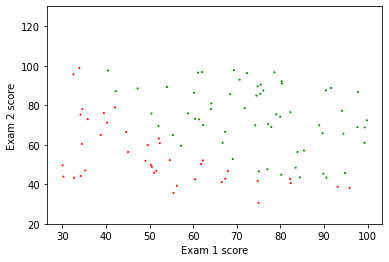

In [10]:
plt.scatter(data['Exam 1'], data['Exam 2'], c=color, s=1)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.ylim(20, 130)
plt.show()

<b>Ex. 3, Ex.4.</b>: Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it. 

In [11]:
def sig(t):
  return 1.0 / (1.0 + np.exp(-t))

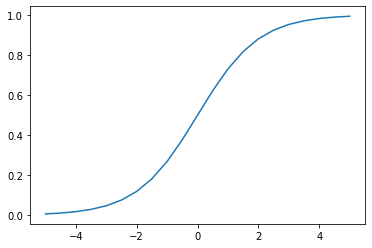

In [12]:
xx = np.arange(-5,5 + .5, step=0.5)
plt.plot(xx, sig(xx))

<b>Ex. 5.</b> Based on the above formulas, please implement the cost function.

In [13]:
def cost_compute(theta, X, y):
    m = y.shape[1]
    h = sig(theta.T @ X)
    y_1 = -y*np.log(h)
    y_0 = (1-y)*np.log(1-h)
    J = (y_1 - y_0).sum() / m
    return J

In [14]:
theta = np.zeros((X.shape[0], 1))
cost_compute(theta, X, y)

0.6931471805599453

<b>Ex. 6.</b> Please implement simple gradient function:

In [15]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        h = sig(theta.T @ X)
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost += [cost_compute(theta, X, y)]

    return theta, cost

In [16]:
alpha = 1
it = 150
theta, cost = simple_gradient(X, y, theta, alpha, it)

In [17]:
cost[-1]

0.2064071430444978

In [18]:
theta

array([[1.41957362],
       [3.35941597],
       [3.11271333]])

<b>Ex. 7.</b> Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5.

In [19]:
prediction = np.round(sig(theta.T @ X))
correct = np.sum((prediction == y).astype(int))
accuracy = correct / X.shape[1]
print("Accuracy: ", accuracy)

Accuracy:  0.89


<b>Ex. 7.</b> Boundary

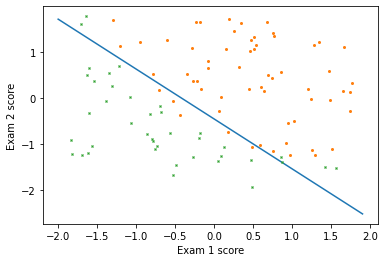

In [20]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o', markersize=2)
plt.plot(X1_0, X2_0, 'x', markersize=2)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

## Multi-class logistic regression

<b>Ex. 1, Ex. 2</b>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, accuracy_score
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [22]:
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

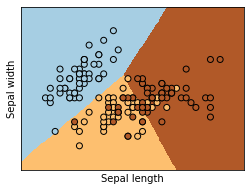

In [23]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = logreg.predict(X)
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

<b>Ex. 3.</b> Using method predict_proba please predict the probability of being a member of a given class.

(array([[5.72028789, 0.47108253, 0.33648752, 0.20189251, 0.        ,
         0.0672975 , 0.        , 0.40378503, 0.67297505, 2.22081765],
        [2.62460268, 1.34595009, 0.94216506, 1.14405758, 0.74027255,
         1.4132476 , 1.07676007, 0.67297505, 0.13459501, 0.        ],
        [3.56676775, 0.60567754, 1.00946257, 0.74027255, 0.94216506,
         0.87486756, 0.74027255, 0.74027255, 0.53838004, 0.33648752]]),
 array([1.05436640e-05, 9.90731568e-02, 1.98135770e-01, 2.97198383e-01,
        3.96260996e-01, 4.95323609e-01, 5.94386223e-01, 6.93448836e-01,
        7.92511449e-01, 8.91574062e-01, 9.90636675e-01]),
 <a list of 3 BarContainer objects>)

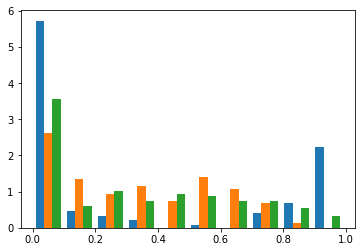

In [24]:
plt.hist(logreg.predict_proba(X), density=True)

<b>Ex. 4.</b> Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2).

In [25]:
mean_squared_error(Y, ZZ)

0.18

In [26]:
logreg.score(X, Y)

0.82